<a href="https://colab.research.google.com/github/roshisaxena/recommend_ottplatform/blob/main/recommend_ottplatform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

In [ ]:
import io

In [ ]:
df = pd.read_csv("/content/netflix.csv")

In [ ]:
...
"""Q.1). Defining Problem Statement and Analysing basic metrics.


Buisness Problem Statement:

Netflix is popular media and video streaming ptalforms having approximately 10k movies or TV shows on their platform.
We are presented with the tabular dataset which consists of all the movies, tv shows alongwith their description.
We have to analyze the data and present the insights to Netflix which could help them in deciding the following factors to help grow their buisness.

1.Which type of TV shows or movies are popular in which country.
2.Which country gives the highest revenue in TV shows / movies
3.Which is the most popular actor - director pair globally.
4.Which is the most popular actor - director pair in each country.
5.Which is more popular , TV shows or Movies.
6.What kind of movies/TV shows (based on ratings) are released globally.
7.What is the most popular month to release the TV shows / Movies.
8.Which is most popular in TV shows /movies.
9.Has Covid -lockdown impacted their buisness.
10.Find out the no. of movies or TV shows relesed from Feb 2020 to September 2020.
11.What is the best time to launch a TV show/Movie.
12.What kind of content is more popular in each country.

"""

...



In [ ]:
df.shape

(8807, 12)

In [ ]:
"""

Q.2 ). Observations on the shape of data, data types of all the attributes,Conversion of categorical attributes to category(if required),
missing value detection , statiscal summary.


"""

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isna().sum(axis = 0)

show_id            0
type               0
title              1
director        1883
cast             495
country          663
date_added         1
release_year       1
rating             1
duration           1
listed_in          1
description        1
dtype: int64

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include = "all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(8807, 12)

In [ ]:
"""
Q.3) Non- Graphical Analysis : Value counts and unique attributes
"""

In [ ]:
df["show_id"].value_counts

<bound method IndexOpsMixin.value_counts of 0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
8802    s8803
8803    s8804
8804    s8805
8805    s8806
8806    s8807
Name: show_id, Length: 8807, dtype: object>

In [ ]:
df["show_id"].nunique()

8807

In [ ]:
df["show_id"].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df["show_id"].value_counts()

s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64

In [ ]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
df["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [ ]:
df["cast"].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [ ]:
df["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
df["date_added"].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [ ]:
df["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
df["duration"].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [ ]:
df["listed_in"].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [ ]:
df["description"].value_counts()

Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Secrets bubble to the surface after a sensual encounter and an unforeseen crime entangle two friends and a woman caught between them.                        2
                                                                                                                                                            ..
Sent away to evade an arranged marriage, a 14-

In [ ]:
"""
Q.5 ) Missing Value & Outlier check (Treatment optional)
"""


In [ ]:
# to check the number of missing values in each column

df.isna().sum(axis = 0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Missing Value treatment

# We will fill categorical data with "Anonymous " or "Unknown" and numerical data with median

In [ ]:
df["cast"].fillna("Anonymous",inplace = True)

df["director"].fillna("Anonymous",inplace = True)

df["date_added"] = pd.to_datetime(df["date_added"])

df["date_added"].fillna(df["date_added"].median(),inplace = True)

df["country"].fillna("Anonymous",inplace = True)

df["duration"].fillna("0",inplace = True)

df["rating"].fillna("0",inplace = True)

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Anonymous,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Anonymous,Anonymous,Anonymous,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Anonymous,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
"""
Q.4). Visual Analysis : Univariate, Bi-variate after pre-processing of data

"""

In [ ]:
"""
Steps in Pre-Processing of Data: (Un-nesting of Columns)

1.) We will create four dataframes named as df_actor,df_director, df_country,df_genre with unnested cast , directors, countries and genres.
2.)  Once , the four dataframes are created, we will merge the df_actor and df_director and name it as df1
3.) Then, we will merge df_country and df_genre and name it as df2.
4.) Then, we will merge df1 and df2 to get df_final dataframe.
5.) All the dataframes will be merged on the basis of a common column named “title”.
6.) Since , we get a final dataframe df_final which contains the unnested cast,directors, countries and genres, but the remaining columns are missing from final dataframe.
7.) We will merge df_final with the original dataframe df with the common column “title” and will get the remaining columns and will keep the name as of original dataframe i.e df.
8.) Then, we will remove the duplicate columns from the dataframe.

"""

In [ ]:
"""
Un- nesting of Cast columns
"""
movie_cast = df['cast'].apply(lambda x: str(x).split(', ')).tolist()

df_actor = pd.DataFrame(movie_cast,index=df['title'])

df_actor = df_actor.stack()

df_actor = pd.DataFrame(df_actor)

df_actor.reset_index(inplace=True)

df_actor = df_actor[['title',0]]

df_actor.columns=['title','cast']


In [ ]:
"""
Un- nesting of director columns
"""

movie_director = df["director"].apply(lambda x: str(x).split(", ")).tolist()

df_director = pd.DataFrame(movie_director,index = df["title"])

df_director = df_director.stack()

df_director = pd.DataFrame(df_director)

df_director.reset_index(inplace = True)

df_director = df_director[["title",0]]

df_director.columns = ["title","director_name"]

In [ ]:
"""
Un-nesting of country column
"""
country_name = df["country"].apply(lambda x: str(x).split(", ")).tolist()

df_country = pd.DataFrame(country_name,index = df["title"])

df_country = df_country.stack()

df_country = pd.DataFrame(df_country)

df_country.reset_index(inplace = True)

df_country = df_country[["title",0]]

df_country.columns = ["title","country_name"]

In [ ]:
"""
Un-nesting of listed_in column
"""
genre_name = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()

df_genre = pd.DataFrame(genre_name,index = df["title"])

df_genre = df_genre.stack()

df_genre = pd.DataFrame(df_genre)

df_genre.reset_index(inplace = True)

df_genre = df_genre[["title",0]]

df_genre.columns = ["title","genre_name"]

In [ ]:
# Merging df_actor and df_director

df1 = df_actor.merge(df_director,on = "title")

In [ ]:
# merging df_country and df_genre

df2 = df_country.merge(df_genre, on = "title")

In [ ]:
# Meging of df1 and df2
df_final = df1.merge(df2,on = "title")

In [ ]:
df_final.head()

,title,cast,director_name,country_name,genre_name
0,Dick Johnson Is Dead,Anonymous,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,Anonymous,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,Anonymous,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,Anonymous,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,Anonymous,South Africa,International TV Shows


In [ ]:
df_final = df_final.merge(df, on = "title")

In [ ]:
df_final.head()

,title,cast_x,director_name,country_name,genre_name,show_id,type,director,cast_y,country,date_added,release_year,rating,duration,listed_in,description
0,Dick Johnson Is Dead,Anonymous,Kirsten Johnson,United States,Documentaries,s1,Movie,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,Anonymous,South Africa,International TV Shows,s2,TV Show,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,Anonymous,South Africa,TV Dramas,s2,TV Show,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,Anonymous,South Africa,TV Mysteries,s2,TV Show,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,Anonymous,South Africa,International TV Shows,s2,TV Show,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
"""
we will drop duplicate columns :

1. cast_y
2. director
3. country
4. Listed_in

And Rename Cast_x to Actor

"""


In [ ]:
df_final.drop(columns = ["cast_y","director","country","listed_in"],inplace = True)

In [ ]:
df_final.rename(columns = {
    "cast_x" : "Actor"
},inplace = True)

In [ ]:
# Finally, the data is free from missing values, nested values
# Df_final is in processed form
df_final.head()

,title,Actor,director_name,country_name,genre_name,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Anonymous,Kirsten Johnson,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,Anonymous,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,Anonymous,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,Anonymous,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,Anonymous,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df_final.shape

(201991, 12)

In [ ]:
# Q 4.1 ) For continuous variable(s): Distplot, countplot, histogram for univariate analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

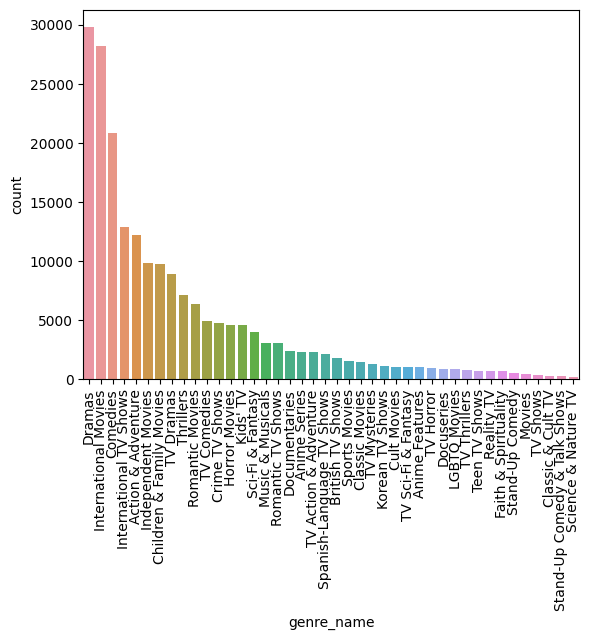

In [ ]:
sns.countplot(data = df_final,
              x = "genre_name",
              order = df_final["genre_name"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

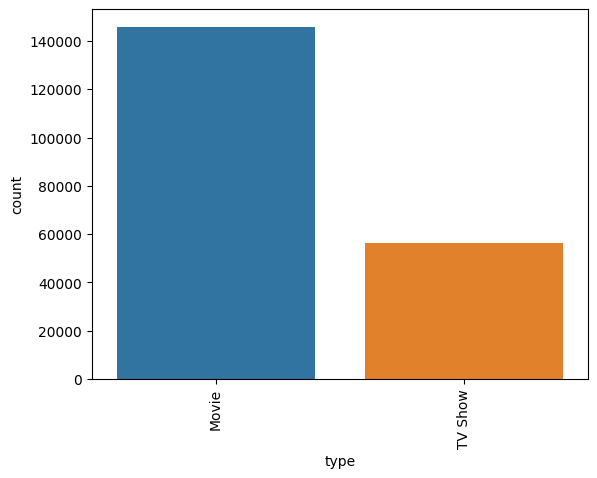

In [ ]:
sns.countplot(data = df_final,
              x = "type",
              order = df_final['type'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

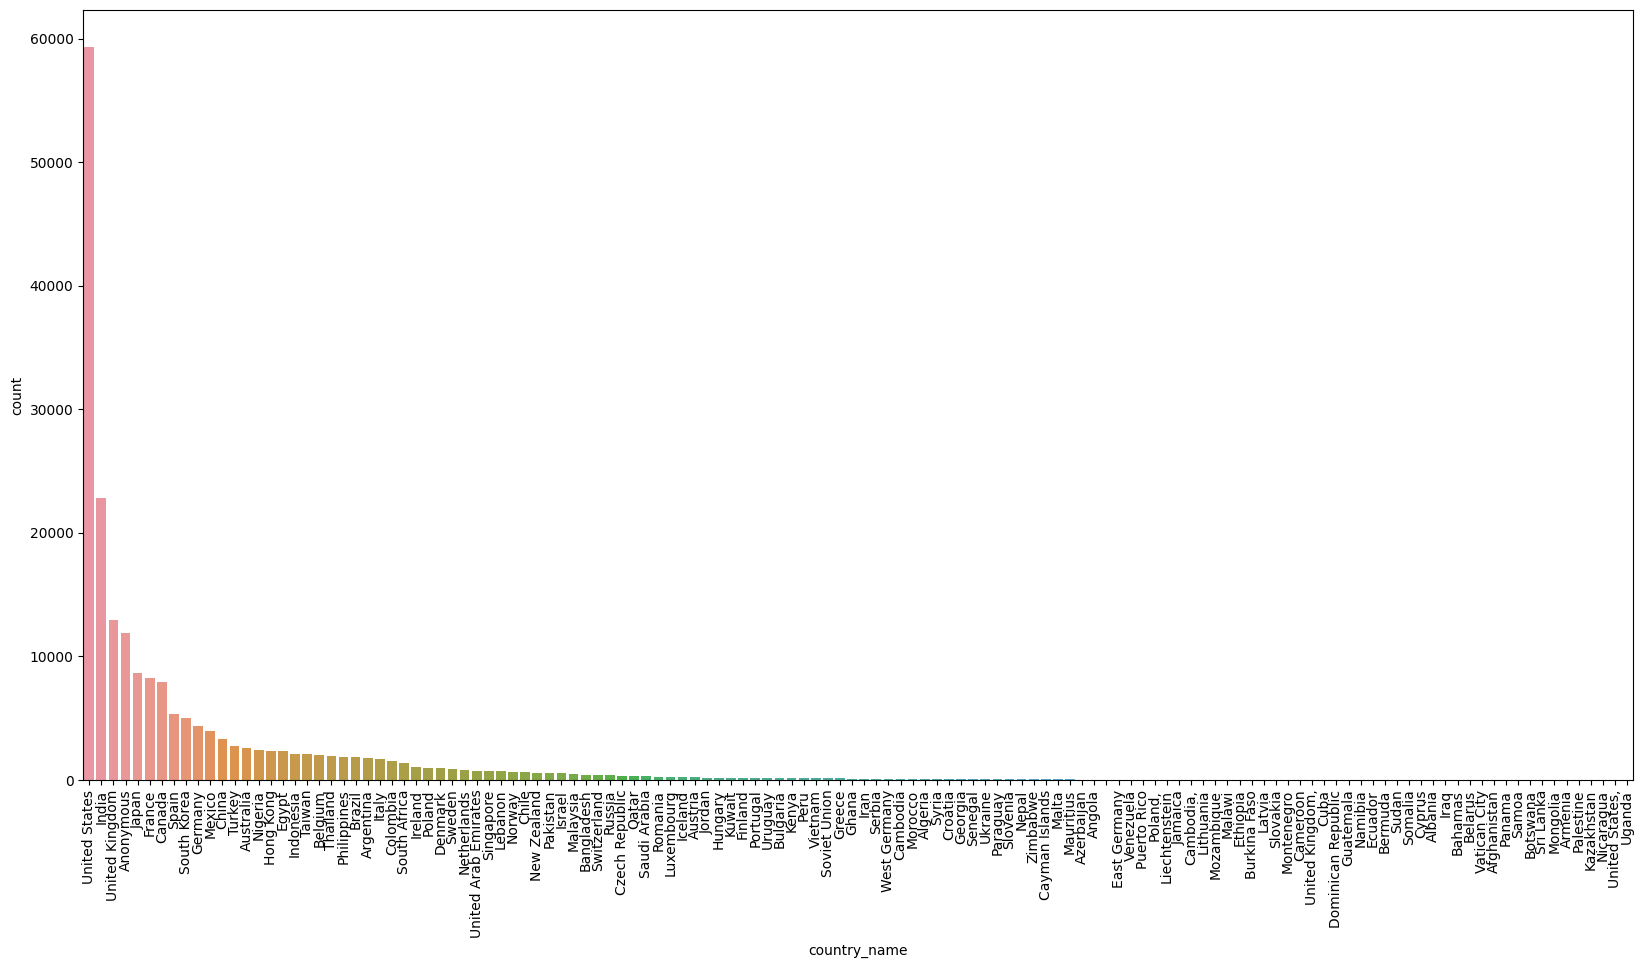

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_final,
              x = "country_name",
              order = df_final['country_name'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

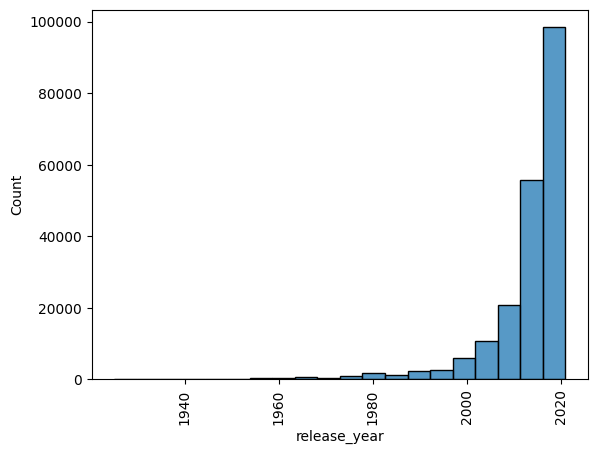

In [ ]:
sns.histplot(data = df_final,
             x = "release_year",
             bins = 20)
plt.xticks(rotation = 90)
plt.show()

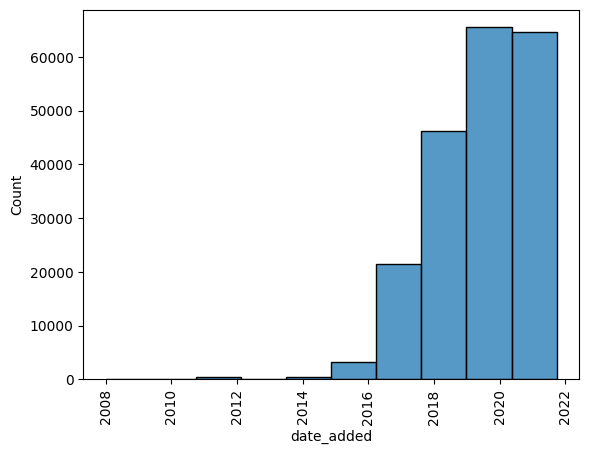

In [ ]:
sns.histplot(data = df_final,
             x = "date_added",
             bins = 10)
plt.xticks(rotation = 90)
plt.show()

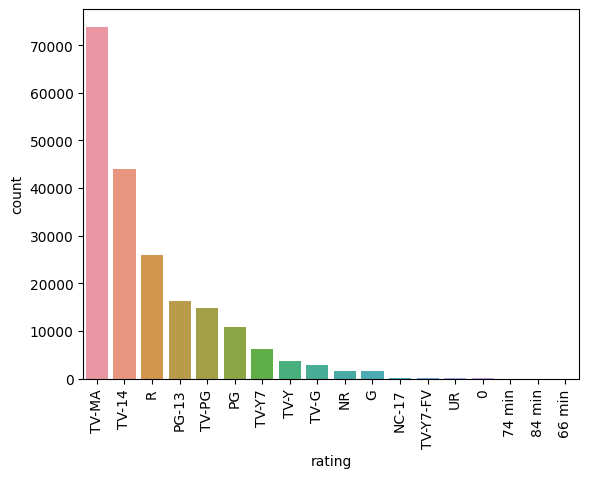

In [ ]:
sns.countplot(data = df_final,
              x = "rating",
              order = df_final['rating'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Q 4.2) For categorical variable(s): Boxplot

<Axes: xlabel='release_year', ylabel='type'>

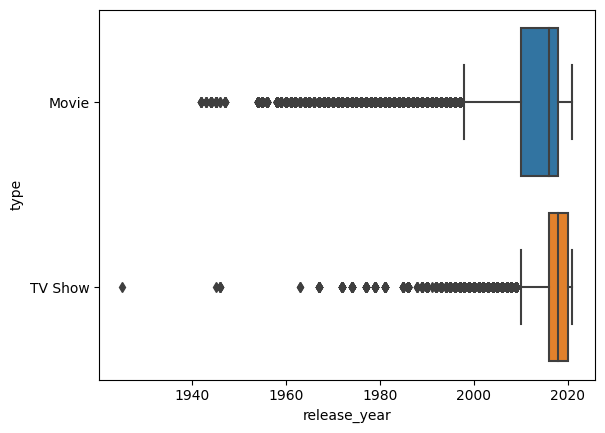

In [ ]:
sns.boxplot(data = df_final,
            x = "release_year",
            y = "type",

            )

In [ ]:
df_final["date_added"] = df_final["date_added"].astype(int)

<Axes: xlabel='date_added', ylabel='type'>

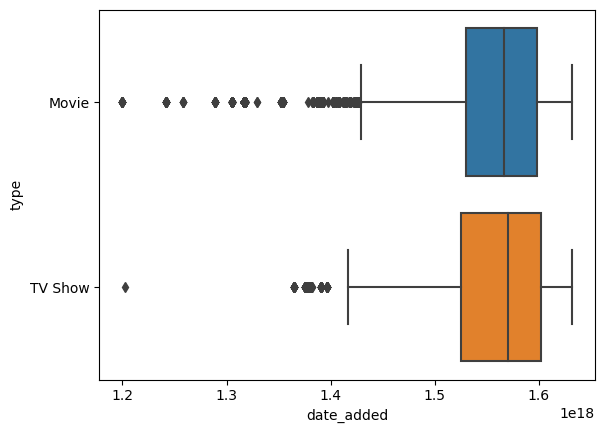

In [ ]:
sns.boxplot(data = df_final,
            x = "date_added",
            y = "type",)

In [ ]:
# Q 4.3) For correlation: Heatmaps, Pairplots

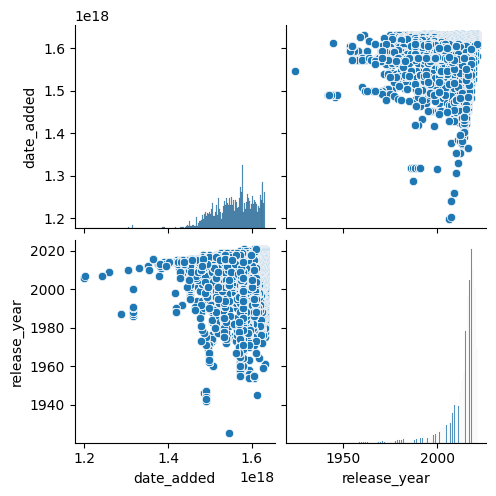

In [ ]:
sns.pairplot(data = df_final)

In [ ]:
"""

Q.6) Insights based on Non-Graphical and Visual Analysis

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

"""



In [ ]:
# 6.1 Comment on the range of attributes

"""
1. There are 8807 rows and 12 columns
2. Director,cast,country,date_added,rating and duration have null values present in it
3. Director has 1883 null values.
4. Cast has 495 null values.
5. country has 663 null values.
6. date_added has 1 null values.
7. release_year has 1 null value.
8. rating has 1 null value.
9. duration has 1 null value.
10. listed_in has 1 null value.
11. description has 1 null value.

12. There are no duplicates and null values are present in show_id column. It can used as a primary key.
13. There are only 2 types : Movies and TV Shows
14. Rajiv Chilaka has directed most of the movies.
15. David Attenborough is the most popular actor and has acted in approximately 19 movies
"""

In [ ]:
#  6.2 Comments on the distribution of the variables and relationship between them

"""
1. United States is the largest producer of content on Netflix followed by India and United Kingdom.
2. Romania, Bulgaria,Hungary,Uruguay,Guatemala,columbia,jordan gives least content to Netflix.
3. Most of the content were released in 2018, but were added on 1st Janaury 2020 followed by later months of 2020.
4. TV shows having only one season is most popular
"""

In [ ]:
# 6.3 Comments for each univariate and bivariate plot

"""
# Insights based on univariate

1. Top 3 watch genres in the global market are :
   Dramas
   International Movies
   Comedies

2. Lowest performing genres across globe are :
   Classic and Cult TV
   Stand up Comedy and Talk shows
   Science and Nature TV ( least performing)

3. Movies are watched by a large set of users as compared to TV Shows.

4. Top 3 countries who are major creator of Content
    United States
    India
    United Kingdom

# Insights based on bi-variate

1. After creating a boxplot of movies and TV shows, we can say that audiencea are more inclined towards movies rather than TV shows.
2. In Percentage terms, 40% of the movie users watch TV shows.
3. Maximum number of movies /TV shows were added in 2020- 2021, may be due to Covid Lockdown which may have added to  users inclination towards Netflix.
4. Not much of the content has been created before 2015.
5. We can see many outliers also before 2015.
"""

In [ ]:
"""
Q.7 ) Buisness insights

1. Most of the movies were released on 2018, but added on Janaury 1, 2020.
2. Most of the content is produced for TV - MA (category where age >17 are allowed to watch)
3. Kids content is least produced.
4. There are more number of users who watch the shows with a single season.
5. Number of users have drastically fallen for a show with more than one season.
6. Dramas and International movies are the most watched content on netflix.
7. Users have started developing interest in netflix in the late 2000 and interset has grown since 2020.
8. Movies are watched by a large sets of audience than TV shows . This is because TV shows has probably number of seasons which is quite time taking,
   but a movie needs much less time than a TV show.
9. Users are more inclined towards movies

"""

In [ ]:
'''
Q.8 ) Recommendation


1. Netflix may consider the contract termination with those countries who gives least content.
2. We have seen that Netflix has added most of the movies on janaury 1, 2020 followed by other months of 2020 which implies that people tend to watch
   more movies during their free time (as lockdown has been imposed in later months of 2020). Netflix should consider adding more movies during Christmas
   or New Year Break or on Weekends.
3. Netflix may consider creating content for Kids also.
4. Netflix nay consider adding more drama and international movies category.
5. Netflix may consider removing stand -up comedy , cult shows and Science and nature TV because these are least watched content by users.
6. Resource cost used in the countries where content production is almost 1 or 0 can be used where the usage of netflix is high.
7. Netflix may consider adding more movies rather than TV shows because movies has a large set of audience.


'''